In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


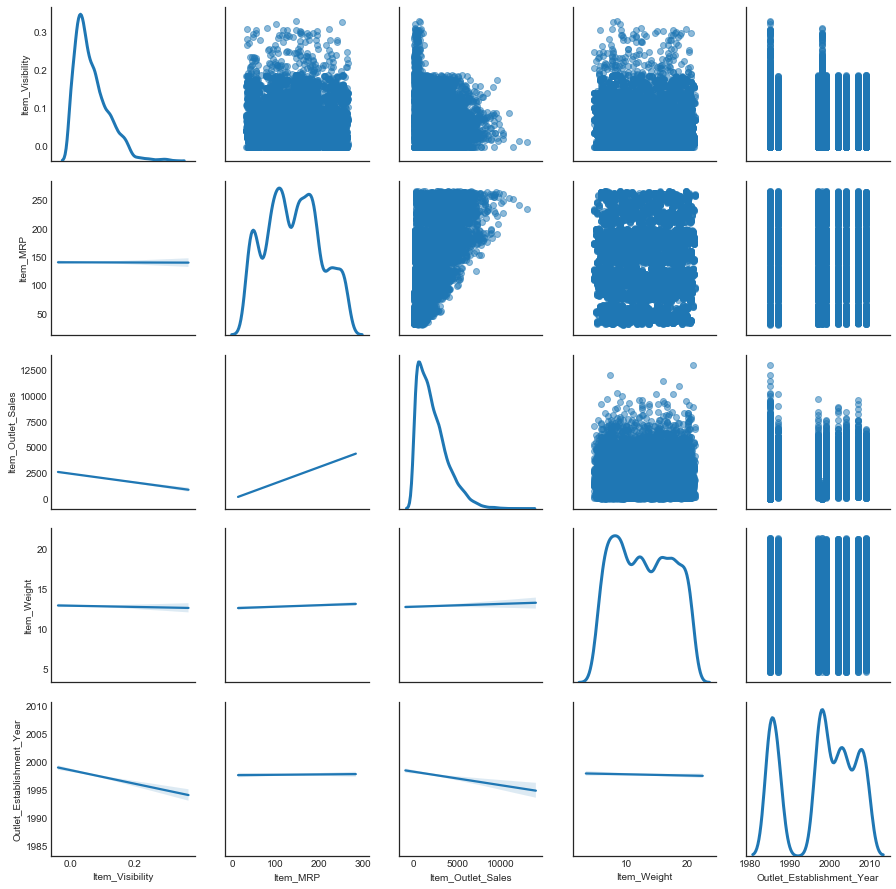

In [2]:
# Make the scatterplot matrix
# Set the default plot aesthetics to be prettier.
sns.set_style("white")

data1 = pd.read_csv('bigmart_train.csv')
data1.head
# Take a subset of the data to make plots clearer.
data1sub = data1[['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Item_Outlet_Sales',
                'Item_Weight', 'Outlet_Location_Type', 'Outlet_Establishment_Year', 'Outlet_Identifier']].dropna()
# Because the variables can only take integer values between 0 and 10, points
# on the scatterplot will hide one another. To better see all the points, we
# create a dataframe of random noise (or "jitter") and add it only when plotting.

# Make a copy of the data to add jitter to and plot.
#data1sub_jittered = data1sub.loc[:, 'Item_Outlet_Sales':'Outlet_Establishment_Year'].dropna()
# Making the random noise.
#jitter = pd.DataFrame(
#    np.random.uniform(-.3, .3, size=(data1sub_jittered.shape)),
#   columns=data1sub_jittered.columns
#)
# Combine the data and the noise.
#df_jittered = data1sub_jittered.add(jitter)
# Declare that you want to make a scatterplot matrix.
#g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
g = sns.PairGrid(data1sub.dropna(), diag_sharey=False)

# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

#Some warnings will show up below because the plot does not include a legend.

In [3]:
data1sub.head(5)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,Item_Weight,Outlet_Location_Type,Outlet_Establishment_Year,Outlet_Identifier
0,DRA12,Low Fat,0.041178,Soft Drinks,140.3154,2552.6772,11.6,Tier 2,2007,OUT017
1,DRA12,Low Fat,0.000000,Soft Drinks,141.6154,3829.0158,11.6,Tier 2,2002,OUT045
2,DRA12,Low Fat,0.040912,Soft Drinks,142.3154,2552.6772,11.6,Tier 3,1987,OUT013
3,DRA12,Low Fat,0.000000,Soft Drinks,141.9154,992.7078,11.6,Tier 2,2004,OUT035
4,DRA12,Low Fat,0.041113,Soft Drinks,142.0154,850.8924,11.6,Tier 3,2009,OUT018


In [4]:
todummy_list = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Item_Identifier', 'Outlet_Identifier']

# Function to dummy all the categorical variables used for modeling
def dummy_df(data1sub, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(data1sub[x], prefix=x, dummy_na=False)
        data1sub = data1sub.drop(x, 1)
        data1sub = pd.concat([data1sub, dummies], axis=1)
    return data1sub

In [5]:
dummy_df(data1sub, todummy_list)



,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Weight,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0.041178,140.3154,2552.6772,11.600,2007,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.000000,141.6154,3829.0158,11.600,2002,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.040912,142.3154,2552.6772,11.600,1987,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0.000000,141.9154,992.7078,11.600,2004,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.041113,142.0154,850.8924,11.600,2009,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0.068535,143.0154,283.6308,11.600,1998,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0.040154,164.6868,1146.5076,19.350,2007,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0.069909,163.2868,491.3604,19.350,1985,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,0.066832,163.8868,327.5736,19.350,1998,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,0.039735,165.7868,4913.6040,19.350,1985,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


                           Item_Visibility  Item_MRP  Item_Outlet_Sales  \
Item_Visibility                   1.000000 -0.001229          -0.128537   
Item_MRP                         -0.001229  1.000000           0.567352   
Item_Outlet_Sales                -0.128537  0.567352           1.000000   
Item_Weight                      -0.008389  0.025501           0.012952   
Outlet_Establishment_Year        -0.074707  0.005081          -0.049098   

                           Item_Weight  Outlet_Establishment_Year  
Item_Visibility              -0.008389                  -0.074707  
Item_MRP                      0.025501                   0.005081  
Item_Outlet_Sales             0.012952                  -0.049098  
Item_Weight                   1.000000                  -0.012184  
Outlet_Establishment_Year    -0.012184                   1.000000  


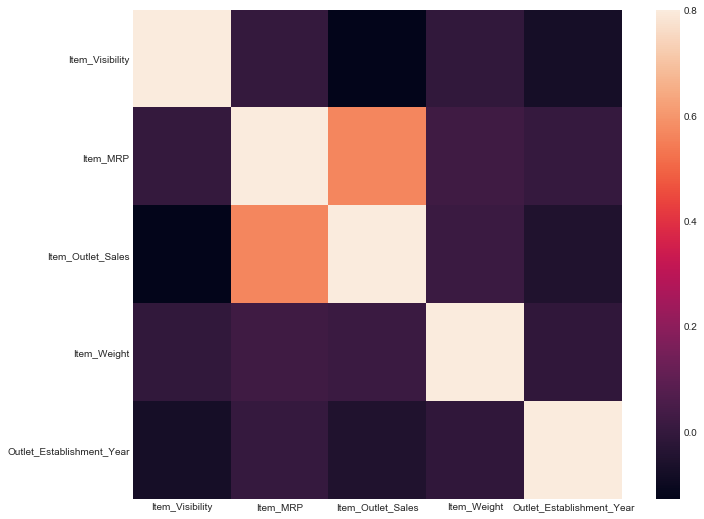

In [6]:
# Make the correlation matrix.
corrmat = data1sub.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [7]:
# How much data is missing?
data1sub.isnull().sum().sort_values(ascending=False).head()

Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Item_Weight                  0
Item_Outlet_Sales            0
dtype: int64

In [8]:
# Use PCA from sklearn.decompostion to find principal components
#from sklearn.decomposition import PCA

#pca = PCA(n_components=10)
#data1sub_pca = pd.DataFrame(pca.fit_transform(data1sub))

In [9]:
data1sub.head(10)


,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,Item_Weight,Outlet_Location_Type,Outlet_Establishment_Year,Outlet_Identifier
0,DRA12,Low Fat,0.041178,Soft Drinks,140.3154,2552.6772,11.60,Tier 2,2007,OUT017
1,DRA12,Low Fat,0.000000,Soft Drinks,141.6154,3829.0158,11.60,Tier 2,2002,OUT045
2,DRA12,Low Fat,0.040912,Soft Drinks,142.3154,2552.6772,11.60,Tier 3,1987,OUT013
3,DRA12,Low Fat,0.000000,Soft Drinks,141.9154,992.7078,11.60,Tier 2,2004,OUT035
4,DRA12,Low Fat,0.041113,Soft Drinks,142.0154,850.8924,11.60,Tier 3,2009,OUT018
5,DRA12,Low Fat,0.068535,Soft Drinks,143.0154,283.6308,11.60,Tier 3,1998,OUT010
6,DRA24,Regular,0.040154,Soft Drinks,164.6868,1146.5076,19.35,Tier 2,2007,OUT017
7,DRA24,Regular,0.069909,Soft Drinks,163.2868,491.3604,19.35,Tier 1,1985,OUT019
8,DRA24,Regular,0.066832,Soft Drinks,163.8868,327.5736,19.35,Tier 3,1998,OUT010
9,DRA24,Regular,0.039735,Soft Drinks,165.7868,4913.6040,19.35,Tier 3,1985,OUT027
